### 2. 데이터 다루기
#### 2-1. 훈련 세트와 테스트 세트 

- 지도 학습 : 
    - 훈련 데이터 = 입력(데이터) + 정답(타깃)
- 비지도 학습 : 입력 데이터만 있을 때는 비지도 학습 알고리즘 사용

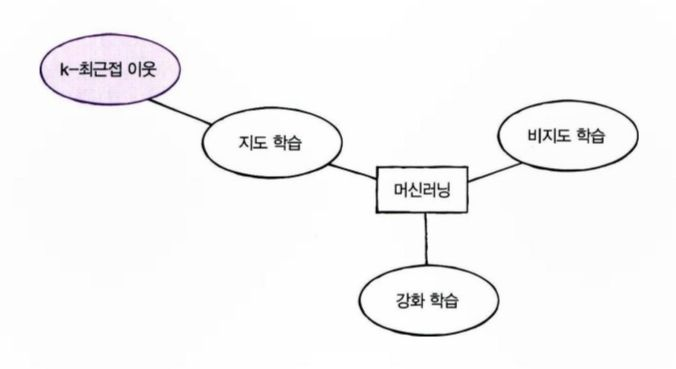


머신 러닝 알고리즘의 성능을 제대로 평가하려면 훈련 데이터와 평가에 사용할 데이터가 각각 달라야 함 <br>
따라서 평가를 위해 또 다른 데이터를 준비하거나 이미 준비된 데이터 중에 일부를 떼어 내어 활용 

- 테스트 세트 : 평가에 사용하는 데이터 
- 훈련 세트 : 훈련에 사용되는 데이터 

In [126]:
# 도미와 빙어 데이터 입력

fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [127]:
# 각 생선의 길이와 무게를 하나의 리스트로 담은 2차원 리스트 생성 

fish_data = [[l, w] for l, w in zip(fish_length, fish_weight)]
fish_target = [1] * 35 + [0] * 14 # 49개의 샘플 존재 

In [128]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()

In [129]:
# 1) 훈련 세트로 입력값 중 0부터 34번째 인덱스까지 사용 
train_input = fish_data[:35]
# 2) 훈련 세트로 타깃값 중 0부터 34번째 인덱스까지 사용
train_target = fish_target[:35]
# 3) 테스트 세트로 입력값 중 35번째부터 마지막 인덱스까지 사용
test_input = fish_data[35:]
# 4) 테스트 세트로 타깃값 중 35부터 마지막 인덱스까지 사용
test_target = fish_target[35:]

In [130]:
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

0.0

- 샘플링 편향 : 훈련 세트와 샘플링 세트에 샘플이 골고루 섞여 있지 않아 샘플링이 한쪽으로 치우쳐진 상태 

In [131]:
# numpy : 파이썬의 대표적인 배열(array) 라이브러리

import numpy as np

In [132]:
input_arr = np.array(fish_data)
target_arr = np.array(fish_target)

In [133]:
print(input_arr)

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]


In [134]:
print(input_arr.shape) # (샘플 수, 특성 수) 출력

(49, 2)


인덱스를 섞은 다음 input_arr와 target_arr에서 샘플을 선택하면 무작위로 훈련 세트를 나누는 것과 같음 

넘파이에서 무작위 결과를 만드는 함수들은 실행할 때마다 다른 결과를 만들기 떄문에 일정한 결과를 얻으려면 초기에 랜덤시드를 지정해야함 

In [135]:
np.random.seed(42)
index = np.arange(49) # np.arange(N) : 0에서 N-1까지 증가하는 배열 생성 
np.random.shuffle(index) # shuffle() : 주어진 배열을 무작위로 섞음

In [136]:
print(index)

[13 45 47 44 17 27 26 25 31 19 12  4 34  8  3  6 40 41 46 15  9 16 24 33
 30  0 43 32  5 29 11 36  1 21  2 37 35 23 39 10 22 18 48 20  7 42 14 28
 38]


In [137]:
print(input_arr[[1,3]]) # 배열 인덱싱

[[ 26.3 290. ]
 [ 29.  363. ]]


In [138]:
# index 배열의 처음 35개를 전달하여 랜덤한 35개의 샘플을 훈련 세트로 구성 

train_input = input_arr[index[:35]]
train_target = target_arr[index[:35]]

In [139]:
print(input_arr[13], train_input[0])

[ 32. 340.] [ 32. 340.]


In [140]:
# 나머지 14개 샘플을 테스트 세트로 구성 

test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]

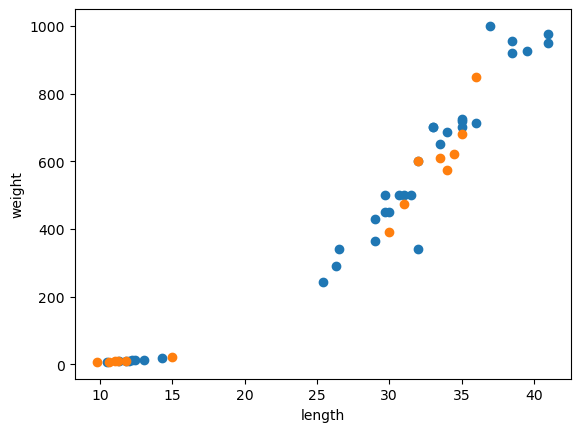

In [141]:
import matplotlib.pyplot as plt
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(test_input[:,0], test_input[:,1])
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [142]:
# k-최근접 이웃 모델 재훈련
kn.fit(train_input, train_target)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [143]:
kn.score(test_input, test_target)

1.0

In [144]:
kn.predict(test_input)

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

In [145]:
test_target

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

#### 2-2. 데이터 전처리 

In [146]:
# 데이터 전처리 
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [147]:
import numpy as np

In [148]:
np.column_stack(([1,2,3],[4,5,6]))

array([[1, 4],
       [2, 5],
       [3, 6]])

파이썬의 **튜플**은 리스트처럼 원소에 순서가 있지만 한 번 만들어지면 수정할 수 없음<br> 함수로 전달한 값이 바뀌지 않는다는 것을 믿을 수 있기 떄문에 매개변수 값으로 많이 사용됨 

In [149]:
fish_data = np.column_stack((fish_length, fish_weight))

print(fish_data[:5])

[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]
 [ 29.  363. ]
 [ 29.  430. ]]


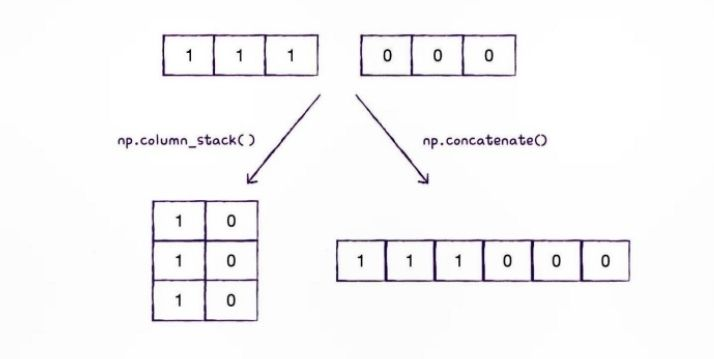

In [150]:
# 원하는 개수의 1과 0을 채운 배열 생성 

fish_target = np.concatenate((np.ones(35), np.zeros(14)))   

print(fish_target)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


데이터가 클수록 파이썬 리스트는 비효율적이므로 넘파이 배열을 사용하는 것이 좋음 

In [151]:
# train_test_split() : 전달되는 리스트나 배열을 비율에 맞게 훈련 세트와 테스트 세트로 랜덤하게 배정

from sklearn.model_selection import train_test_split

In [152]:
train_input, test_input, train_target, test_target = train_test_split(
    fish_data, fish_target, random_state=42)

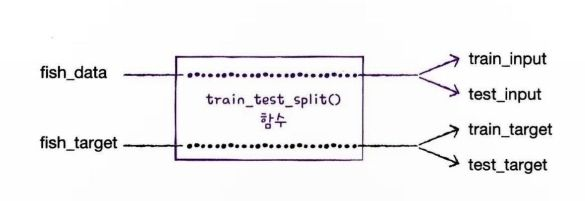

In [153]:
print(train_input.shape, test_input.shape)

(36, 2) (13, 2)


In [154]:
print(train_target.shape, test_target.shape)

(36,) (13,)


입력 데이터는 2차원 배열, 타깃 데이터는 1차원 배열

In [155]:
print(test_target)

[1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


전체 데이터의 도미와 빙어의 비율은 2.5:1이지만, 테스트 세트의 비율은 3.3:1로 나타남. 

무작위로 데이터를 나누었을 때 샘플이 골고루 섞이지 않을 수 있음<br>
특히 일부 클래스의 개수가 적을 때 이런 현상이 발생 

In [156]:
# stratify 매개변수에 타깃 데이터를 전달하면 클래스 비율에 맞게 데이터를 나눌 수 있음 

train_input, test_input, train_target, test_target = train_test_split(
    fish_data, fish_target, stratify=fish_target, random_state=42)

print(test_target)

[0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.]


In [157]:
#k-최근접 이웃 모델 훈련 

from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

In [158]:
print(kn.predict([[25, 150]]))

[0.]


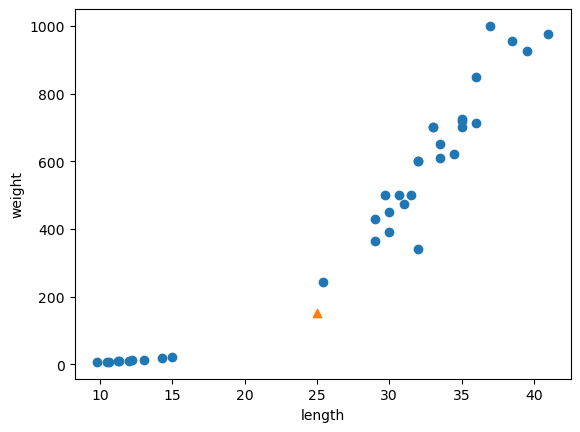

In [159]:
import matplotlib.pyplot as plt
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')   # marker 매개변수는 모양을 지정 
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

k-최근접 이웃은 주변의 샘플 중에서 다수인 클래스를 예측으로 사용<br>
KNeighborsClassifier 클래스는 주어진 샘플에서 가장 가까운 이웃을 찾아 주는 kneighbors()메서드 제공<br>
이 메서드는 이웃까지의 거리와 이웃 샘플의 인덱스를 반환<br>
KNeighborsClassifier 클래스의 이웃 개수은 n_neighbors의 기본값은 5이므로 5개의 이웃이 반환

In [160]:
distances, indexes = kn.kneighbors([[25, 150]])

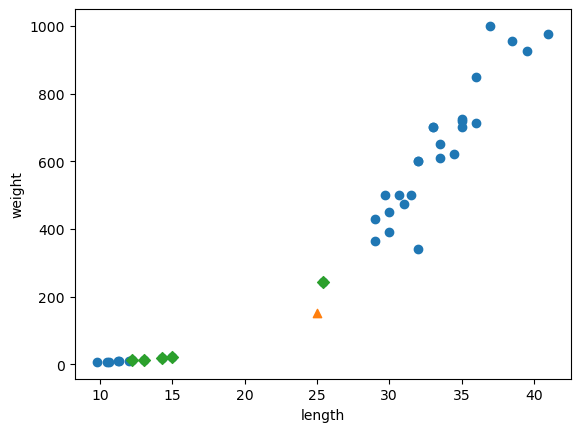

In [161]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')  
plt.scatter(train_input[indexes, 0], train_input[indexes,1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [162]:
print(train_input[indexes])

[[[ 25.4 242. ]
  [ 15.   19.9]
  [ 14.3  19.7]
  [ 13.   12.2]
  [ 12.2  12.2]]]


In [163]:
print(train_target[indexes])

[[1. 0. 0. 0. 0.]]


In [164]:
print(distances)

[[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]]


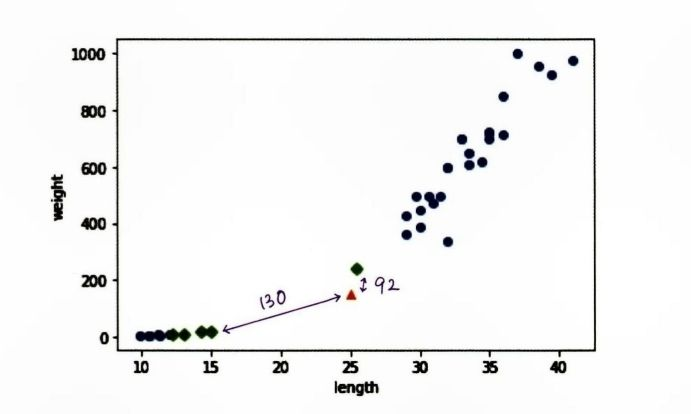

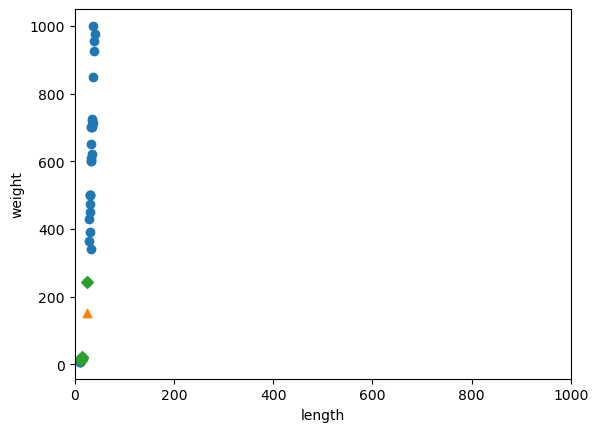

In [165]:
# x축과 y축의 범위를 동일하게 맞추기

plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')  
plt.scatter(train_input[indexes, 0], train_input[indexes,1], marker='D')
plt.xlim((0, 1000))
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

생선의 길이 (x축)은 가장 가까운 이웃을 찾는데 크게 영향을 미치지 않음 

값이 놓인 범위가 다를 때, **스케일**이 다르다고 표현<br>
특히, 알고리즘이 거리 기반일 때 데이터를 표현하는 기준이 다르면 올바르게 예측할 수 없음<br>

- 데이터 전처리 : 데이터 분석을 위해 수집한 데이터를 분석에 적합한 형태로 가공하는 과정


- 표준점수(z 점수) : 가장 널리 사용하는 전처리 방법 중 하나<br>
각 특성값이 평균에서 표준편차의 몇 배만큼 덜어져 있는지를 나타냄<br>
실제 특성값의 크기와 상관없이 동일한 조건으로 비교할 수 있음 
- 분산 : 데이터에서 평균을 뺀 값을 모두 제곱한 값의 평균
- 표준편차 : 분산의 제곱근

- 표준화 : 데이터를 표준점수로 전환하는 과정

In [166]:
mean = np.mean(train_input, axis=0)     # 평균 
std = np.std(train_input, axis=0)       # 표준편차

print(mean, std)

[ 27.29722222 454.09722222] [  9.98244253 323.29893931]


- 브로드캐스팅 : 모양이 다른 **배열**들 간의 연산이 어떤 조건을 만족했을 때 가능해지도록 배열을 자동적으로 변환

In [167]:
train_scaled = (train_input - mean) / std

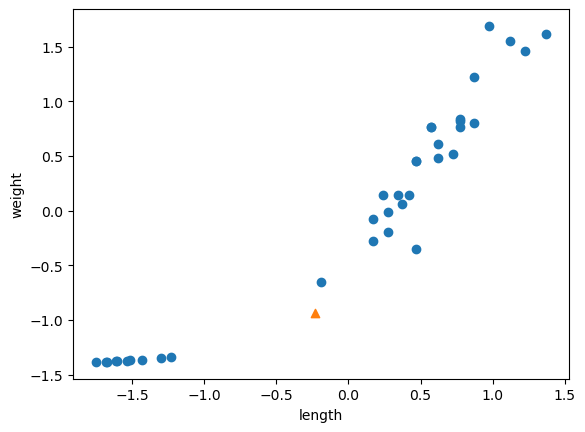

In [168]:
new = ([25,150] - mean) / std

plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

x축과 y축의 범위에 주목

In [171]:
kn.fit(train_scaled, train_target)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


훈련 후 테스트 세트를 평가할 때는 훈련 세트의 기준으로 테스트 세트를 변환해야 같은 스케일로 산점도를 그릴 수 있음 

In [172]:
test_scaled = (test_input - mean) / std

In [173]:
kn.score(test_scaled, test_target)

1.0

In [174]:
print(kn.predict([new]))

[1.]


길이가 25cm, 무게가 150g인 생선은 도미임을 알 수 있음

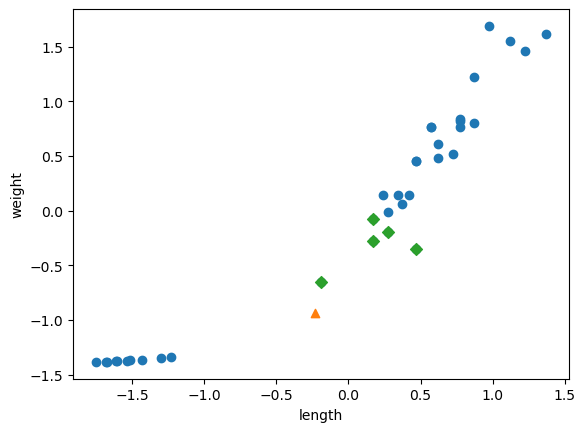

In [176]:
distances, indexes = kn.kneighbors([new])

plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')
plt.scatter(train_scaled[indexes, 0], train_scaled[indexes, 1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()